🔹 Task 1: Load an image and apply a thresholding method. Analyze and discuss the segmentation results.

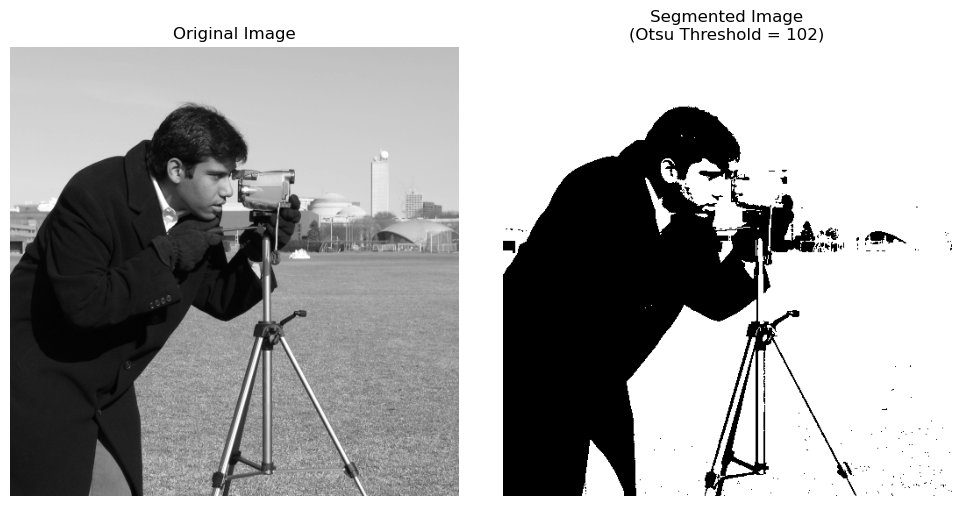

In [1]:
import matplotlib.pyplot as plt
from skimage import data, filters

# Step 1: Load a built-in grayscale image (camera)
image = data.camera()

# Step 2: Apply Otsu's thresholding
threshold_value = filters.threshold_otsu(image)
binary_image = image > threshold_value

# Step 3: Display the original and segmented images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title(f"Segmented Image\n(Otsu Threshold = {threshold_value})")
ax[1].axis('off')

plt.tight_layout()
plt.show()


🔹 Task 2: Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.

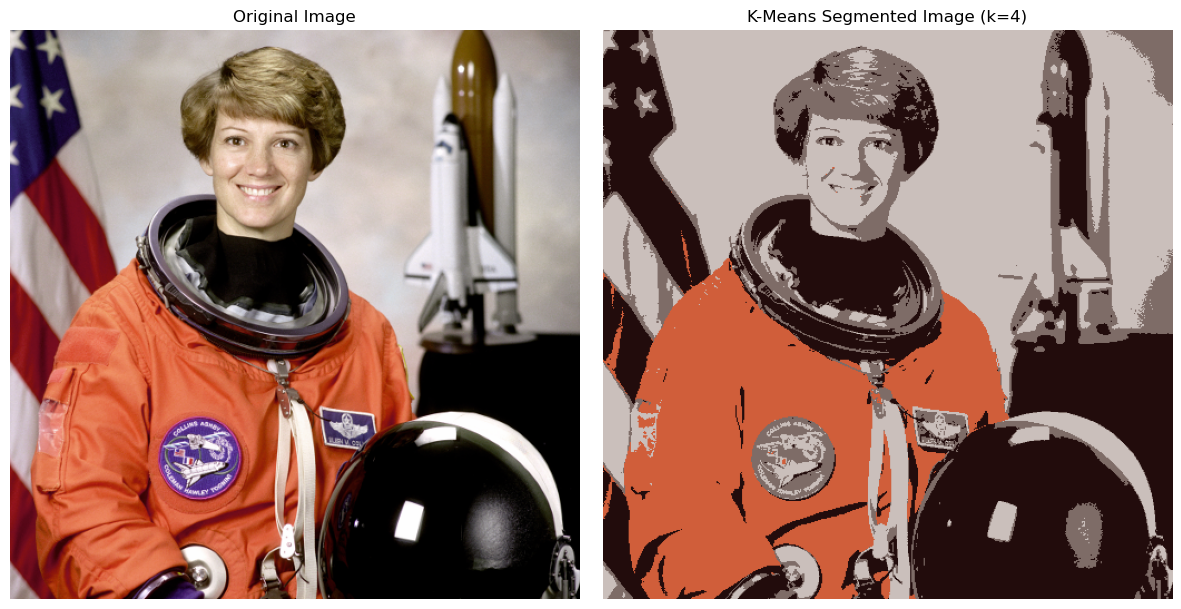

In [2]:
import matplotlib.pyplot as plt
from skimage import data
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Load a sample color image
image = data.astronaut()  # RGB image
h, w, c = image.shape

# Step 2: Reshape the image to a 2D array of pixels (for clustering)
pixels = image.reshape(-1, 3)

# Step 3: Apply K-Means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]

# Step 4: Reshape back to image dimensions
segmented_image = segmented_pixels.reshape(h, w, 3).astype(np.uint8)

# Step 5: Plot original and segmented images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(segmented_image)
ax[1].set_title(f"K-Means Segmented Image (k={k})")
ax[1].axis('off')

plt.tight_layout()
plt.show()


🔹 Task 3: Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.

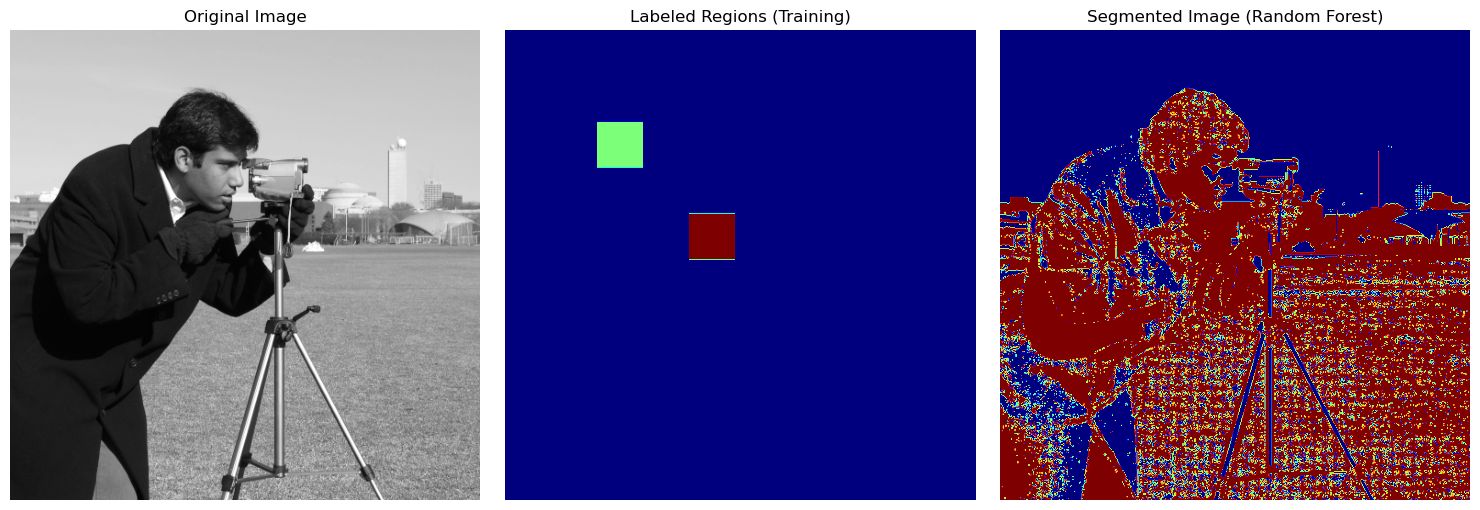

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, feature
from skimage.util import img_as_float
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Step 1: Load grayscale image
image = data.camera()
image = img_as_float(image)

# Step 2: Simulate ground truth labels for training
# Create two simple labeled regions manually (bright and dark)
labels = np.zeros(image.shape, dtype=np.uint8)
labels[100:150, 100:150] = 1  # Class 1 (bright region)
labels[200:250, 200:250] = 2  # Class 2 (dark region)

# Step 3: Feature extraction for each pixel
# We’ll use pixel intensity and Sobel edge response as features
intensity = image.reshape(-1)
edges = filters.sobel(image).reshape(-1)
features = np.stack([intensity, edges], axis=1)

# Step 4: Prepare training data
flat_labels = labels.reshape(-1)
mask = flat_labels > 0  # Only use labeled pixels for training

X_train = features[mask]
y_train = flat_labels[mask]

# Step 5: Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Predict on all pixels
y_pred = clf.predict(features)
segmented = y_pred.reshape(image.shape)

# Step 7: Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(labels, cmap='jet')
ax[1].set_title("Labeled Regions (Training)")
ax[1].axis('off')

ax[2].imshow(segmented, cmap='jet')
ax[2].set_title("Segmented Image (Random Forest)")
ax[2].axis('off')

plt.tight_layout()
plt.show()


🔹 Task 4: Explain the main differences between supervised and unsupervised segmentation approaches. Discuss their advantages and disadvantages, and illustrate your explanation with an example.

**Supervised vs Unsupervised Segmentation – Differences and Characteristics**

Supervised segmentation uses labeled data to train a model to recognize and classify regions in an image. You first provide ground truth annotations (e.g., masks or labeled regions), and then the model learns to associate image features with specific labels. This approach is typically more accurate for known categories but requires a large amount of annotated data.

Unsupervised segmentation, on the other hand, does not use any labels. It groups pixels or regions based on similarities in color, texture, or intensity using clustering or statistical techniques like K-means or Gaussian Mixture Models. This method is helpful when annotations are not available but may produce less semantically meaningful segments.

**Advantages of supervised segmentation:**

- High accuracy for known classes.
- Learns complex patterns using deep models (e.g., CNNs).
- Good generalization with quality data.

**Disadvantages of supervised segmentation:**
- Needs large annotated datasets.
- Annotation process is time-consuming and expensive.
- May not generalize well to unseen categories.

**Advantages of unsupervised segmentation:**

- No need for labeled data.
- Quick to apply on new or unknown images.
- Useful for exploratory analysis.

**Disadvantages of unsupervised segmentation:**

- May not align with semantic meaning.
- Results depend heavily on feature selection and algorithm choice.
- Less control over the outcome.

**Example:**
Suppose you are segmenting satellite images to find urban, forest, and water regions. In supervised segmentation, you would train a model with labeled images where each pixel is annotated (e.g., urban = red, forest = green, water = blue). In unsupervised segmentation, you'd apply clustering like K-means to group pixels based on color or texture patterns, but the clusters won’t be automatically labeled — you’ll have to interpret them manually.
